**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [1]:
import pandas as pd
df = pd.read_csv('web_sites_data.csv', sep=';', index_col=None)
df.head(7)

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."
5,"<html>\n<head profile=""http://www.w3.org/2005/..."
6,"<html>\n<head profile=""http://www.w3.org/2005/..."


#### Data processing

In [2]:
# this is MY OWN preprocessing module (https://github.com/zer0deck/MLBM_Tclassifiers/blob/main/Data/Filtering.ipynb)
# I've just modified it hard for this lab
from preprocessing import text_filter

import time, numpy
from ipywidgets import Text, Layout
from IPython.display import display
t = Text(value='0',placeholder='Empty',description='Filtering:',disabled=False, layout=Layout(width='50%', height='80px'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zer0deck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zer0deck/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/zer0deck/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
display(t)
full_text_l = []
start = time.time()

for i, text in enumerate(df['text']):

        clear_text = text_filter(text)
        full_text_l.append(clear_text)
        df['text'].iloc[i] = clear_text

        percent = numpy.round(i/len(df)*100, 3)
        now = numpy.round(time.time()-start, 3)
        
        t.value = f'Completed: {percent}%, Time gone:{now}'

Text(value='0', description='Filtering:', layout=Layout(height='80px', width='50%'), placeholder='Empty')

/Users/zer0deck/Documents/Документы/Магистратура/nlp/preprocessing.py:100: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 100 of the file /Users/zer0deck/Documents/Документы/Магистратура/nlp/preprocessing.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(inputt)


In [4]:
from random import randint
df['text'][0]

'eric newby love war apennines eric newby love war apennines author eric newby title love war apennines moochable copies copy available amazon suggests short walk hindu kush slowly ganges shore mediterranean last grain race round ireland low gear recommended bookmooch box bookmooch bookmark show recommendations topics abridged ancient asia audiobooks biography memoir biography memoirs general book cassette eastern front edition format europe florence hiroshima nagasaki history history europe general history europe italy general home front intelligence operation italy iwo jima medieval milan military naples naval normandy pearl harbor personal narrative reference refinement renaissance rome sardinia sicily stalingrad travel travel europe italy general tuscany umbria venice western front woman world war writing published english binding audio cassette pages date isbn publisher harpercollins audio weight pound size inch edition abridged amazon prices previous givers jessierey usa previous

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [5]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

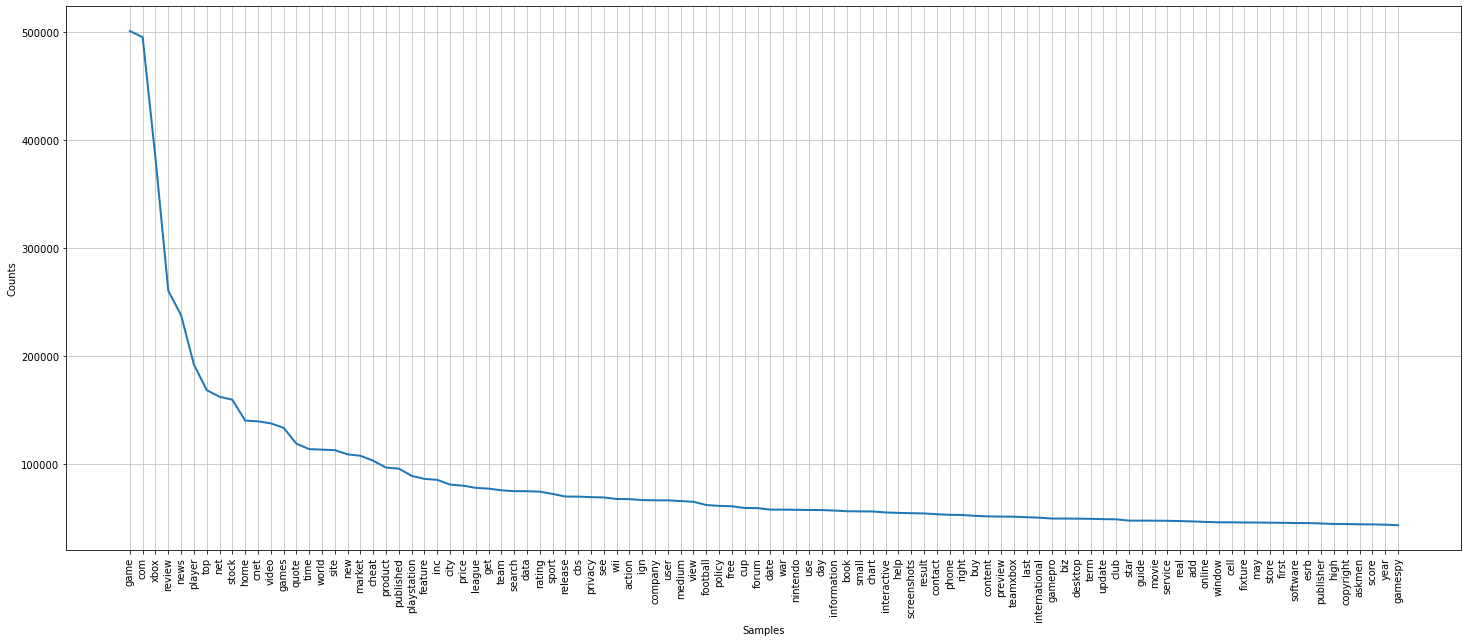

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
full_text = " ".join(full_text_l)
plt.figure(figsize=(25,10))
graph = FreqDist(full_text.split())
graph.plot(100)

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [7]:
print(full_text[1:200])

ric newby love war apennines eric newby love war apennines author eric newby title love war apennines moochable copies copy available amazon suggests short walk hindu kush slowly ganges shore mediter


> My preprocessing module delete all the numbers and special digits like `'`, but I'm trying to warn this in my module

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [8]:
def create_gramems(text, size):
    tokens = text.split()
    return [' '.join(tokens[i:i+size]) for i in range(len(tokens) - size + 1)]

def dgsearch(df, size, range_s=3000):
    df_grammms = []
    for i in range(range_s):
        df_grammms.append(create_gramems(df['text'][i],size))
    return df_grammms

In [9]:
#MinHashLSH with datasketch library:
from datasketch import MinHash, MinHashLSH

def MH(num_perm, df_grammms, range_s=3000):
    wl = []
    for i in range(range_s):
        wl.append(MinHash(num_perm=num_perm))

    for i in range(range_s):
        for d in df_grammms[i]:
            wl[i].update(d.encode('utf8'))

    lsh = MinHashLSH(threshold=0.5, num_perm=num_perm)
    for i in range(range_s):
        lsh.insert("m"+str(i), wl[i])
    return wl, lsh


In [10]:
def uniq_count(wl, lsh, range_s=3000, t=False, table = None):
    uniq = 0

    for i in range(range_s):
        neighbours = lsh.query(wl[i])
        f = f'm{i}'
        neighbours.remove(f)

        if t:
            if len(neighbours) < 10:
                table.add_row([f, neighbours])

        if not neighbours:
            uniq+=1
    
    return uniq

In [11]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['GOAL', 'NEIGHBOURS']

#the whole dataset search
df_grammms = dgsearch(df, 5)
wl, lsh = MH(num_perm=128, df_grammms=df_grammms)
uniq = uniq_count(wl, lsh, 3000, True, table=table)

table.align = "l"
print(table)

+-------+-----------------------------------------------------------------------------------+
| GOAL  | NEIGHBOURS                                                                        |
+-------+-----------------------------------------------------------------------------------+
| m0    | ['m469']                                                                          |
| m1    | ['m1504', 'm470']                                                                 |
| m2    | ['m471']                                                                          |
| m3    | ['m472']                                                                          |
| m4    | ['m473']                                                                          |
| m5    | ['m474']                                                                          |
| m6    | ['m475']                                                                          |
| m7    | ['m476']                                          

> I print only the rows with less than 10 neighbours just to make table look better

In [12]:
from ipywidgets.widgets import Text
from IPython.display import display

f = f"Total unique 3000: {uniq}"
t = Text(value=f,placeholder='Duplicates:',description='Result:',disabled=False, layout=Layout(width='100%', height='80px'))
display(t)
print(f)

Text(value='Total unique 3000: 298', description='Result:', layout=Layout(height='80px', width='100%'), placeh…

Total unique 3000: 298


> by size:

In [13]:
full_uniq = []
full_i = []
for i in range(3, 20):
    df_grammms = dgsearch(df, i)
    wl, lsh = MH(num_perm=128, df_grammms=df_grammms)
    uniq = uniq_count(wl, lsh, 3000, True, table=table)
    full_uniq.append(uniq)
    full_i.append(i)
    f = f'Minhash len = {i}, uniq = {uniq}'
    print(f)

Minhash len = 3, uniq = 103
Minhash len = 4, uniq = 319
Minhash len = 5, uniq = 298
Minhash len = 6, uniq = 170
Minhash len = 7, uniq = 360
Minhash len = 8, uniq = 373
Minhash len = 9, uniq = 376
Minhash len = 10, uniq = 513
Minhash len = 11, uniq = 458
Minhash len = 12, uniq = 637
Minhash len = 13, uniq = 598
Minhash len = 14, uniq = 647
Minhash len = 15, uniq = 688
Minhash len = 16, uniq = 770
Minhash len = 17, uniq = 740
Minhash len = 18, uniq = 868
Minhash len = 19, uniq = 845


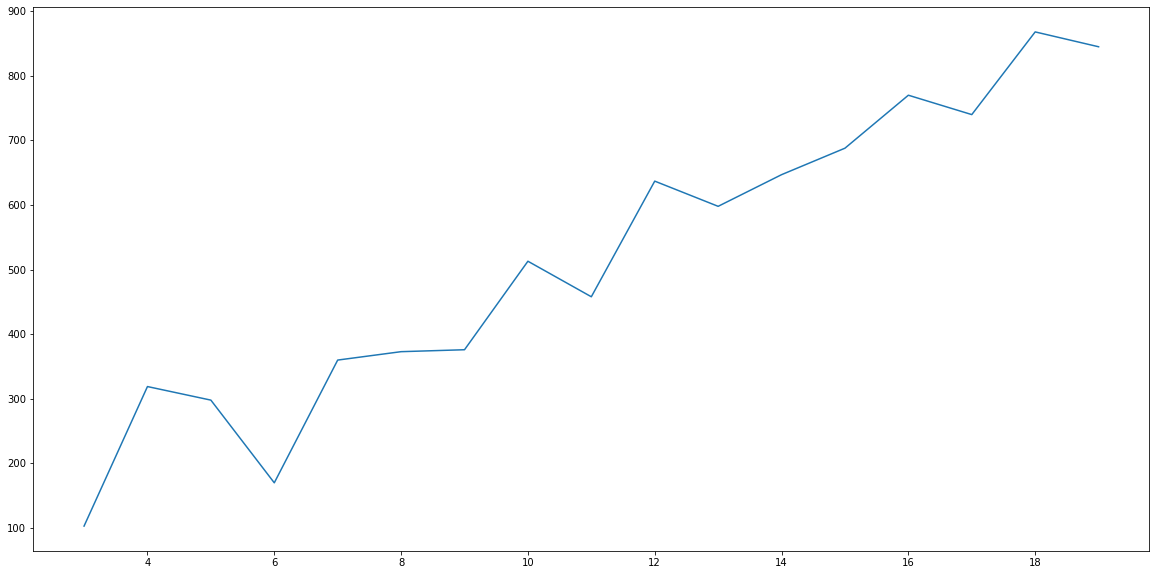

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(full_i, full_uniq)

> by num_perm

In [15]:
full_uniq = []
full_i = []
for i in range(128, 1280, 128):
    df_grammms = dgsearch(df, 5)
    wl, lsh = MH(num_perm=i, df_grammms=df_grammms)
    uniq = uniq_count(wl, lsh, 3000, True, table=table)
    full_uniq.append(uniq)
    full_i.append(i)
    f = f'num_perm = {i}, uniq = {uniq}'
    print(f)

num_perm = 128, uniq = 298
num_perm = 256, uniq = 305
num_perm = 384, uniq = 215
num_perm = 512, uniq = 285
num_perm = 640, uniq = 257
num_perm = 768, uniq = 219
num_perm = 896, uniq = 219
num_perm = 1024, uniq = 278
num_perm = 1152, uniq = 258


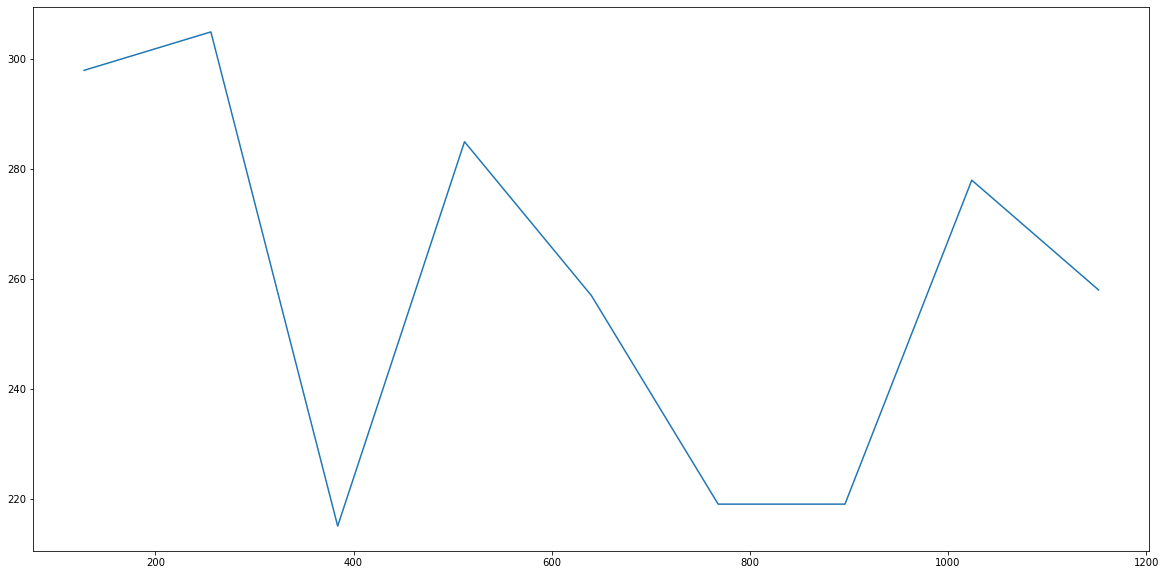

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(full_i, full_uniq)

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.